### Predict Machine Learning - Multiple Regression Linear

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import statsmodels
from sklearn.datasets import load_boston
from sklearn import linear_model
import warnings
warnings.filterwarnings('ignore')

In [14]:
boston = load_boston()

In [15]:
boston['data'].shape

(506, 13)

In [16]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [17]:
# Melihat nilai variabel Y / variabel target
boston['target']

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [18]:
# Melihat variabel y / variabel feature
boston['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [19]:
df = pd.DataFrame(data=boston['data'], columns=boston['feature_names'])
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [20]:
type(boston['target'])

numpy.ndarray

- Mengubah kolom target dari numpy menjadi Series

In [21]:
target = pd.Series(boston['target'])

In [22]:
df['Price']=target

In [23]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


- Explonatory Data Analyst

In [24]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
Price      float64
dtype: object

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [26]:
bsDesc = []
for i in df.columns:
    bsDesc.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
        round((df[i].isna().sum()/len(df))*100,2),
        df[i].nunique(),
        df[i].drop_duplicates().sample(2).values
    ])

In [27]:
pd.DataFrame(data=bsDesc,
             columns=[
                 'Features',
                 'DataType',
                 'Null',
                 'NullPercentage',
                 'Unique',
                 'UniqueSample'
             ])

,Features,DataType,Null,NullPercentage,Unique,UniqueSample
0,CRIM,float64,0,0.0,504,"[0.02875, 0.05302]"
1,ZN,float64,0,0.0,26,"[18.0, 70.0]"
2,INDUS,float64,0,0.0,76,"[15.04, 3.37]"
3,CHAS,float64,0,0.0,2,"[1.0, 0.0]"
4,NOX,float64,0,0.0,81,"[0.409, 0.422]"
5,RM,float64,0,0.0,446,"[6.129, 6.031]"
6,AGE,float64,0,0.0,356,"[61.5, 70.4]"
7,DIS,float64,0,0.0,412,"[1.9265, 1.9682]"
8,RAD,float64,0,0.0,9,"[24.0, 8.0]"
9,TAX,float64,0,0.0,66,"[281.0, 270.0]"


- Melihat outlier kolom Price

<AxesSubplot:xlabel='Price'>

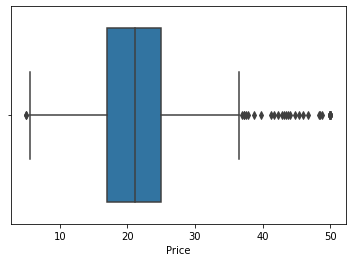

In [28]:
sns.boxplot(df['Price'])

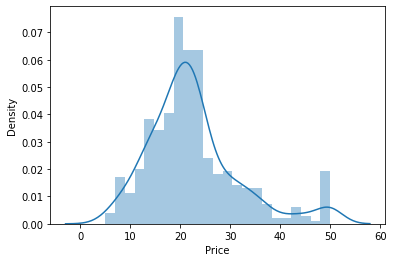

In [29]:
sns.distplot(df['Price'])
plt.show()

In [30]:
# Melihat korelasi dengan pearson

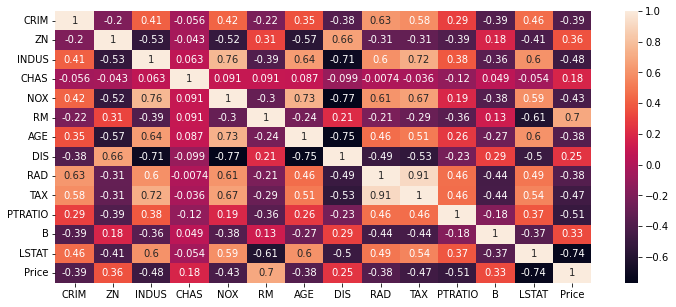

In [31]:
plt.figure(figsize=(12,5))
sns.heatmap(df.corr(),annot=True)
plt.show()

- Berhubung yang kurang dari 0.5 cukup banyak, disini saya menghapus yang kurang 0.5 dan memakai yang di atas 0.05.

In [32]:
df.drop(columns=['ZN','CHAS','DIS','RAD','B'],inplace=True)

- Mengecek hasil korelasi yang sudah dihapus kolomnya

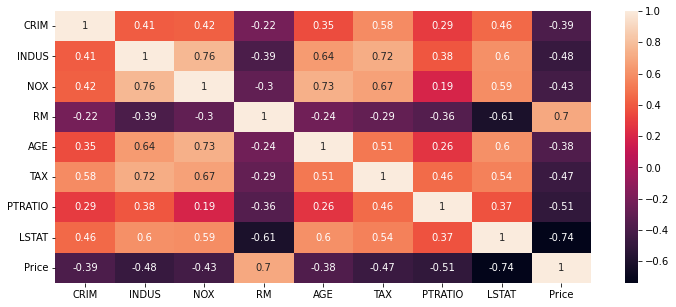

In [33]:
plt.figure(figsize=(12,5))
sns.heatmap(df.corr(),annot=True)
plt.show()

# Memisahkan data untuk di training dan di test

In [34]:
X = df.drop(columns='Price')
y = df['Price']

In [35]:
from sklearn.model_selection import train_test_split

- Disini saya memisahkan data untuk di training dan di test, untuk datanya saya menggunakan 15% dari data yang ada untuk di test random state ini saya gunakan untuk mengunci angka biar tidak berubah saat di run.

In [36]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size =.15, random_state=8)

In [37]:
## Data soal untuk belajar dan untuk latihan/Try out
X_train.head()

,CRIM,INDUS,NOX,RM,AGE,TAX,PTRATIO,LSTAT
298,0.06466,2.24,0.400,6.345,20.1,358.0,14.8,4.97
68,0.13554,6.07,0.409,5.594,36.8,345.0,18.9,13.09
496,0.28960,9.69,0.585,5.390,72.9,391.0,19.2,21.14
153,2.14918,19.58,0.871,5.709,98.5,403.0,14.7,15.79
33,1.15172,8.14,0.538,5.701,95.0,307.0,21.0,18.35


In [38]:
## Data soal untuk ujian yang sesungguhnya
X_test.head()

,CRIM,INDUS,NOX,RM,AGE,TAX,PTRATIO,LSTAT
337,0.03041,5.19,0.515,5.895,59.6,224.0,20.2,10.56
30,1.13081,8.14,0.538,5.713,94.1,307.0,21.0,22.60
364,3.47428,18.10,0.718,8.780,82.9,666.0,20.2,5.29
240,0.11329,4.93,0.428,6.897,54.3,300.0,16.6,11.38
162,1.83377,19.58,0.605,7.802,98.2,403.0,14.7,1.92


In [39]:
## Kunci jawaban soal ujian yang di training
y_train.head()

298    22.5
68     17.4
496    19.7
153    19.4
33     13.1
Name: Price, dtype: float64

In [40]:
## Kunci jawaban soal ujian yang akan di training
y_test.head()

337    18.5
30     12.7
364    21.9
240    22.0
162    50.0
Name: Price, dtype: float64

In [41]:
X_train.shape

(430, 8)

In [42]:
X_test.shape

(76, 8)

# Machine Learning Modelling

In [43]:
from sklearn.linear_model import LinearRegression

In [44]:
# y = ax + b

In [45]:
Model = LinearRegression(fit_intercept=True)

- Membuat pola pattern latihan dan jawaban dari latihan

In [46]:
Model.fit(X_train,y_train)

LinearRegression()

- Melakukan penilaian/evaluation matrix train set

In [47]:
Model.score(X_train,y_train)

0.6931397182159605

- Melakukan penilaian/evaluation matrix test set

In [48]:
Model.score(X_test,y_test)

0.6362367832355484

- Melihat prediksi training x

In [49]:
Model.predict(X_train)

array([30.28293062, 18.72273928, 12.9477843 , 21.47917065, 14.95890191,
        3.58200036, 14.19124961, 23.35025631, 19.35500691, 31.04458353,
       16.49716494, 12.75154295, 27.07355077, 31.59739533, 21.83292028,
       22.70332871, 30.11961514, 32.50703653, 18.22839889, 30.63150702,
       21.94467111, 24.57289026, 22.77783979, 15.67085757,  0.7667683 ,
       28.41303216,  0.39830966, 38.89920947, 33.96509303, 26.66478313,
       20.63939197, 23.92672508, 27.59687608, 29.713177  , 16.29998859,
       19.83225735, 39.87581772, 10.39622747, 21.31016924, 20.00803487,
       38.23805478, 14.14122618, 24.36427216, 21.73500701, 28.20216403,
       28.28743397, 17.81294284, 25.41208932, 24.49722379, 16.63403918,
       24.87017934, 29.2373735 , 37.84800486,  7.04791954, 24.64694627,
       39.64239435, 28.86363763, 29.79917199, 19.48423179, 11.49630654,
       18.52754611,  9.62698857, 24.53889975, 19.14013188, 27.96006475,
       32.61343669, 27.08760364, 30.13315595, 35.66269411, 23.10

- Melihat prediksi sesungguhnya

In [50]:
Model.predict(X_test)

array([20.50582545, 12.46725002, 36.23112133, 28.06065089, 40.18702295,
       24.63261533, 13.44020281, 30.68392827, 28.55866471, 30.23617052,
       15.39892254,  4.40332104, 15.55684093, 23.70221877, 18.53306088,
       29.59212573, 23.15857419, 21.94629854, 21.65208669,  6.63232485,
       22.28604537, 27.91953014, 31.36359548, 33.48971972, 30.45134373,
       31.80900657,  2.61308954, 17.01283145, 27.70003152, 23.7412566 ,
       33.44428837, 18.15037051, 19.07476999, 22.41192249, 27.22943475,
       26.13185735, 33.30549739, 25.9615366 , 14.55873061, 11.98492314,
       19.32117528, 24.14387396, 34.96348631, 33.59926292, 29.18611367,
       21.67489955, 17.23428769, 19.47662042, 23.745383  , 22.62602001,
       21.22623411, 14.77604841, 31.52809258, 15.02452071, 20.59125377,
       26.17424237, 20.23661409,  1.53793722, 19.60419261, 29.01321651,
       27.1525987 , 20.10417387, 22.22661286, 11.35604616, 17.39468283,
       21.24462801, 10.13908929, 19.87767821, 33.99280817, 36.62

In [51]:
Model.intercept_

20.115832202121155

In [52]:
Model.coef_

array([-5.45727030e-02,  3.68513224e-02, -4.05892636e+00,  4.47903517e+00,
        2.29732166e-02, -7.41893715e-04, -9.42582049e-01, -5.94321302e-01])

In [53]:
X_train.columns

Index(['CRIM', 'INDUS', 'NOX', 'RM', 'AGE', 'TAX', 'PTRATIO', 'LSTAT'], dtype='object')

In [54]:
pd.DataFrame(data=Model.coef_,index=X_train.columns,columns=['coef'])

,coef
CRIM,-0.054573
INDUS,0.036851
NOX,-4.058926
RM,4.479035
AGE,0.022973
TAX,-0.000742
PTRATIO,-0.942582
LSTAT,-0.594321


In [55]:
# Y= ax + b2 + cx3 + dx4.....+z

In [56]:
Model.predict([[0,0,0,0,0,0,0,0]])

array([20.1158322])

# Evaluation Matrix

In [57]:
pred_train = Model.predict(X_train)

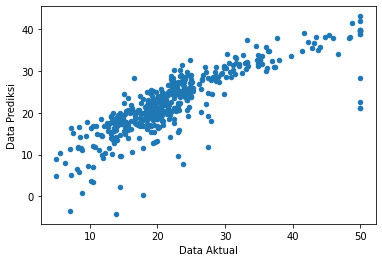

In [58]:
plt.scatter(y_train,pred_train, s=20)
plt.xlabel("Data Aktual")
plt.ylabel("Data Prediksi")
plt.show()

In [59]:
pred_test = Model.predict(X_test)

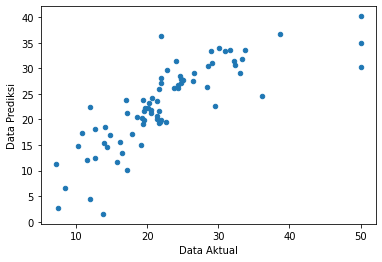

In [60]:
plt.scatter(y_test,pred_test, s=20)
plt.xlabel("Data Aktual")
plt.ylabel("Data Prediksi")
plt.show()

In [61]:
# Menggabungkan kolom training x dengan training y
Training_set = pd.concat([X_train,y_train],axis=1)

In [62]:
Testing_set = pd.concat([X_test,y_test],axis=1)

In [63]:
Training_set['Price_pred'] = pred_train

In [64]:
Training_set.head()

,CRIM,INDUS,NOX,RM,AGE,TAX,PTRATIO,LSTAT,Price,Price_pred
298,0.06466,2.24,0.400,6.345,20.1,358.0,14.8,4.97,22.5,30.282931
68,0.13554,6.07,0.409,5.594,36.8,345.0,18.9,13.09,17.4,18.722739
496,0.28960,9.69,0.585,5.390,72.9,391.0,19.2,21.14,19.7,12.947784
153,2.14918,19.58,0.871,5.709,98.5,403.0,14.7,15.79,19.4,21.479171
33,1.15172,8.14,0.538,5.701,95.0,307.0,21.0,18.35,13.1,14.958902


In [65]:
Training_set['Error'] = abs(Training_set['Price']-Training_set['Price_pred'])

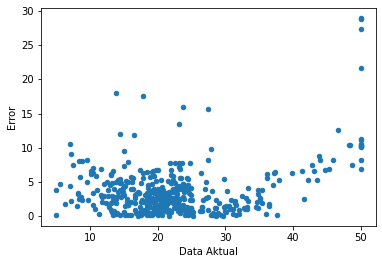

In [66]:
plt.scatter(Training_set['Price'],Training_set['Error'], s=20)
plt.xlabel("Data Aktual")
plt.ylabel("Error")
plt.show()

In [67]:
Training_set.sort_values('Error', ascending=False).head(10)

,CRIM,INDUS,NOX,RM,AGE,TAX,PTRATIO,LSTAT,Price,Price_pred,Error
368,4.89822,18.10,0.631,4.970,100.0,666.0,20.2,3.26,50.0,21.040730,28.959270
372,8.26725,18.10,0.668,5.875,89.6,666.0,20.2,8.88,50.0,21.181212,28.818788
371,9.23230,18.10,0.631,6.216,100.0,666.0,20.2,9.53,50.0,22.658691,27.341309
369,5.66998,18.10,0.631,6.683,96.8,666.0,20.2,3.73,50.0,28.318355,21.681645
374,18.49820,18.10,0.668,4.138,100.0,666.0,20.2,37.97,13.8,-4.207088,18.007088
412,18.81100,18.10,0.597,4.628,100.0,666.0,20.2,34.37,17.9,0.398310,17.501690
214,0.28955,10.59,0.489,5.412,9.8,277.0,18.6,29.55,23.7,7.671422,16.028578
365,4.55587,18.10,0.718,3.561,87.9,666.0,20.2,7.12,27.5,11.823270,15.676730
367,13.52220,18.10,0.631,3.863,100.0,666.0,20.2,13.33,23.1,9.626989,13.473011
228,0.29819,6.20,0.504,7.686,17.0,307.0,17.4,3.92,46.7,34.140319,12.559681


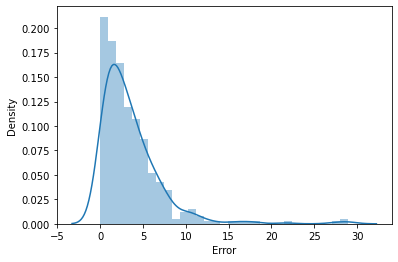

In [68]:
sns.distplot(Training_set['Error'])
plt.show()

In [69]:
Training_set['Error'].mean()

3.5661069063499675

Setelah di analisa untuk melihat error tertinggi, terdapat 10 error tertinggi yaitu 28.959270. Semua baris yang berkenaan dengan error 28.959270 akan di hapus.

In [70]:
# df = df[df['TAX']!=666]

In [71]:
error_train = abs(y_train - pred_train)

In [72]:
error_test = abs(y_test - pred_test)

### Evaluation matrix for regression

In [73]:
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error,median_absolute_error

In [74]:
y_train #kunci jawaban

298    22.5
68     17.4
496    19.7
153    19.4
33     13.1
       ... 
133    18.4
361    19.9
497    18.3
340    18.7
451    15.2
Name: Price, Length: 430, dtype: float64

In [75]:
pred_train = Model.predict(X_train)

In [76]:
r2_train = r2_score(y_train,pred_train)
r2_train

0.6931397182159605

In [77]:
MAE_train = mean_absolute_error(y_train,pred_train)
MAE_train

3.5661069063499675

In [78]:
MSE_train = mean_squared_error(y_train,pred_train)
MSE_train

26.253368193819682

In [79]:
RMSE_train = np.sqrt(MSE_train)
RMSE_train

5.1238040744957924

In [80]:
print("Hasil evaluation matrix untuk data training")
print("="*50)
print("Nilai R Squared : ",r2_train.round(2))
print("Nilai MAE :", MAE_train.round(2))
print("Nilai MSE : ",MSE_train.round(2))
print("Nilai RMSE : ", RMSE_train.round(2))

Hasil evaluation matrix untuk data training
Nilai R Squared :  0.69
Nilai MAE : 3.57
Nilai MSE :  26.25
Nilai RMSE :  5.12


Evaluation Matrix Test :

In [81]:
pred_test = Model.predict(X_test)

In [82]:
r2_test = r2_score(y_test,pred_test)
r2_test

0.6362367832355484

In [83]:
MAE_test = mean_absolute_error(y_test,pred_test)
MAE_test

3.8506530256830644

In [84]:
MSE_test = mean_squared_error(y_test,pred_test)
MSE_test

28.371759325340594

In [85]:
RMSE_test = np.sqrt(MSE_test)
RMSE_test

5.326514744684426

In [86]:
print("Hasil evaluation matrix untuk data test")
print("="*50)
print("Nilai R Squared : ",r2_test.round(2))
print("Nilai MAE :", MAE_test.round(2))
print("Nilai MSE : ",MSE_test.round(2))
print("Nilai RMSE : ", RMSE_test.round(2))

Hasil evaluation matrix untuk data test
Nilai R Squared :  0.64
Nilai MAE : 3.85
Nilai MSE :  28.37
Nilai RMSE :  5.33


In [87]:
data = {
    "Training" : [r2_train,MAE_train,MSE_train,RMSE_train],
    "Testing" : [r2_test,MAE_test,MSE_test,RMSE_test]
}

In [88]:
pd.DataFrame(data,index=["R Squared","MAE","MAE","RMSE"])

,Training,Testing
R Squared,0.693140,0.636237
MAE,3.566107,3.850653
MAE,26.253368,28.371759
RMSE,5.123804,5.326515


Dibuat tabel di atas untuk melihat berapa score testing R Squared, jika dia mendekati 1 maka bagus. jika jauh dari 1 maka underfitting dan jika di atas 1 maka overfitting.
Dari data di atas dilihat kalau hasil score dari testingnya masih underfitting.